In [1]:
import pandas as pd
import numpy as np

compute_time = [0.01, 0.1, 0.5, 1.0, 2.0, 3.0]
batch_size = [256, 512, 1024, 2048, 4096]
num_workers = [0, 1, 2, 4, 6, 8]

rlt = []
exp_id = 0
for t in np.arange(len(compute_time)):
    for b in np.arange(len(batch_size)):
        for w in np.arange(len(num_workers)):
            data = np.load('exp{}.npy'.format(exp_id))
            data -= (compute_time[t]*50000//batch_size[b])
            exp_id += 1
            rlt.append([t, b, w, np.mean(data), np.std(data)])

rlt = pd.DataFrame(rlt, columns=['compute_time', 'batch_size', 'num_workers', 'load_time(mean)', 'load_time(std)'])

/home/ubuntu/.local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


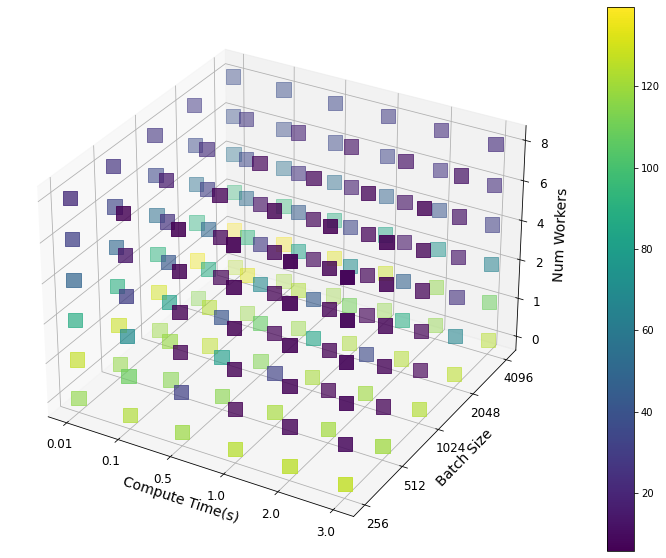

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = rlt.to_numpy()[:, :3].T

sp = ax.scatter(X, Y, Z, s=200, c=rlt['load_time(mean)'], marker='s')

ax.set_xlabel("Compute Time(s)", fontsize=14)
ax.set_ylabel("Batch Size", fontsize=14)
ax.set_zlabel("Num Workers", fontsize=14)

ax.set_xticks(np.arange(len(compute_time))) 
ax.set_xticklabels([str(v) for v in compute_time], fontsize=12)

ax.set_yticks(np.arange(len(batch_size))) 
ax.set_yticklabels([str(v) for v in batch_size], fontsize=12)

ax.set_zticks(np.arange(len(num_workers))) 
ax.set_zticklabels([str(v) for v in num_workers], fontsize=12)

plt.colorbar(sp)
plt.savefig("nfs.png", dpi=300)